In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1hO4YEBFiixx9_y5MwfoCvCd5QE6Zu9b6')

# Indian Food Data Analysis Report

## **Introduction:** Our country India is well known for its diversity in culture as well as for its large number of varieties in dishes.
### This project is all about analysis of Indian-Food-Dishes data:
* Regional analysis of Indian dishes.
* Statewise analysis of Indian dishes.
* Flavor i.e sweet, sour, spicy of different Indian dishes.
* Veg/Non-veg analysis of Indian dishes.

### Tools & techniques used in this project:
* A good dataset having all the relevant informations regarding Indian dishes.
* Python pandas library to convert the raw data into workable data frames.
* Python matplotlib & seaborn library for data visualization.

### Source of Data: https://www.kaggle.com/nehaprabhavalkar/indian-food-101

#### *This report has been submitted as course project for the course Data Analysis with Python: Zero to Pandas.*

## Downloading the Dataset
*   Using **opendatasets** library
*   Providing the URL to download the dataset
*   To download the dataset **.download** method is used

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

In [ ]:
# Defining Dataset URL
dataset_url = 'https://www.kaggle.com/nehaprabhavalkar/indian-food-101' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Kaggle dataset ID:  nehaprabhavalkar/indian-food-101
Using downloaded and verified file: ./indian-food-101.zip
Extracting archive ./indian-food-101.zip to ./indian-food-101


In [ ]:
project_name = "indian-food-data-analysis-report"

In [ ]:
!pip install jovian --upgrade -q

## Data Preparation and Cleaning
*   Importing **pandas** library
*   Creating **pandas data frames**
*   Analysing the No. of rows & columns
*   Droping the rows with Null values and invalid entries.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/indian-food-101/indian_food.csv')
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [ ]:
# Droping the missing values and 'ingredients' column
df = df.drop(['ingredients'],axis=1).dropna(axis=0)
df

,name,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...
250,Til Pitha,vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [ ]:
# Removing data with invalid entries (-1)
df1= df[df.prep_time !=-1]
df1= df1[df1.cook_time !=-1]
df1= df1[df1.flavor_profile !='-1']
df1= df1[df1.state !='-1']
df1= df1[df1.region !='-1']
df1

,name,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...
247,Prawn malai curry,non vegetarian,15,50,spicy,main course,West Bengal,East
249,Shukto,vegetarian,10,20,spicy,main course,West Bengal,East
250,Til Pitha,vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,vegetarian,20,60,sweet,dessert,Goa,West


## Exploratory Analysis and Visualization
*   Importing **libraries for visualization** i.e **matplotlib, seaborn, etc.**
*   Exploring all **Data Columns** using **.info() method**.
*   Computing intersting **statistics** for **numeric** columns using **.describe()** method.
*   Exploring **Dietwise i.e Veg/non-veg** No. of dishes.
*   Exploring **Coursewise i.e dessert, snack, main course, starter** No. of dishes.
*   Exploring **Statewise** No. of dishes.
*   Exploring **Regionwise i.e North, South, Central, etc** No. of dishes.
*   Exploring **Flavorwise i.e Sweet, Sour, Spicy, etc** No. of dishes.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 253
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            180 non-null    object
 1   diet            180 non-null    object
 2   prep_time       180 non-null    int64 
 3   cook_time       180 non-null    int64 
 4   flavor_profile  180 non-null    object
 5   course          180 non-null    object
 6   state           180 non-null    object
 7   region          180 non-null    object
dtypes: int64(2), object(6)
memory usage: 12.7+ KB


In [ ]:
df1.describe()

,prep_time,cook_time
count,180.000000,180.000000
mean,30.705556,40.366667
std,64.158036,54.377215
min,5.000000,5.000000
25%,10.000000,25.000000
50%,10.000000,30.000000
75%,20.000000,45.000000
max,500.000000,720.000000


In [ ]:
# Coursewise No. of dishes
course_counts = df1.course.value_counts()
course_counts

main course    83
dessert        70
snack          25
starter         2
Name: course, dtype: int64

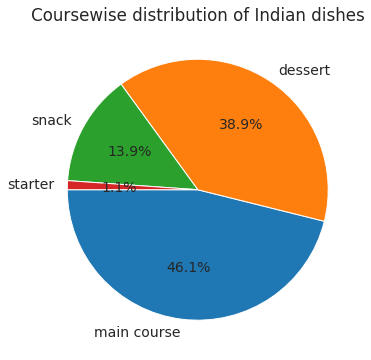

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Coursewise distribution of Indian dishes')
plt.pie(course_counts, labels=course_counts.index, autopct='%1.1f%%', startangle=180);

The pie chart clearly shows the coursewise distribution of Indian dishes.

*   About **46%** of Indian dishes comes under **main course** which is the **highest** among all courses.
*   And only **1%** of Indian dishes comes under **starter** which is the **least** among all courses.



In [ ]:
# Flavorwise No. of dishes
flavor_counts = df1.flavor_profile.value_counts()
flavor_counts

spicy     102
sweet      73
bitter      4
sour        1
Name: flavor_profile, dtype: int64

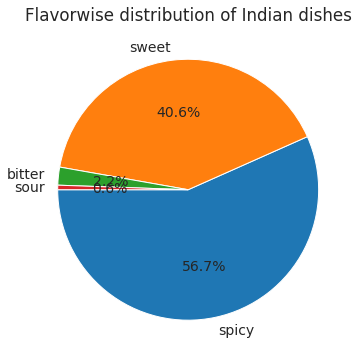

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Flavorwise distribution of Indian dishes')
plt.pie(flavor_counts, labels=flavor_counts.index, autopct='%1.1f%%', startangle=180);

The pie chart clearly shows the flavorwise distribution of Indian dishes.

*   About **56.7%** of Indian dishes are **spicy** which is the **highest** among all flavors.
*   And only **0.6%** of Indian dishes are **sour** which is the **least** among all flavors.

In [ ]:
# Calculating No. of veg & Non-veg dishes
diet_counts = df1.diet.value_counts()
diet_counts

vegetarian        163
non vegetarian     17
Name: diet, dtype: int64

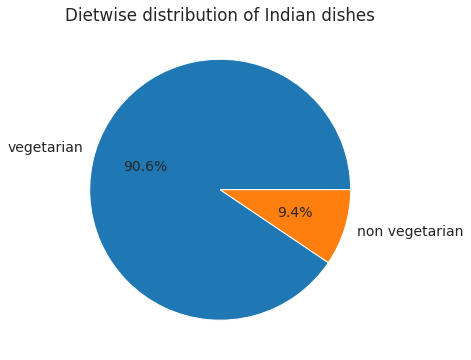

In [ ]:
# Calculating No. of veg & Non-veg dishes
plt.figure(figsize=(12,6))
plt.title('Dietwise distribution of Indian dishes')
plt.pie(diet_counts, labels=diet_counts.index, autopct='%1.1f%%', startangle=360);

The pie chart clearly shows the dietwise distribution of Indian dishes.

*   About **91%** of Indian dishes are **veg**.
*   And only **9%** of Indian dishes are **Non-veg**.

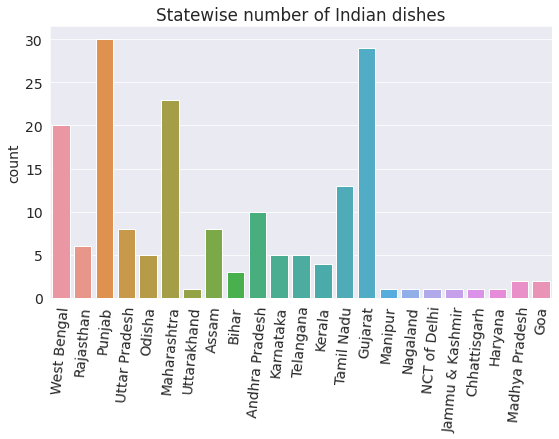

In [ ]:
sns.countplot(x=df1.state)
plt.xticks(rotation=85);
plt.title('Statewise number of Indian dishes')
plt.xlabel(None);

From this graph we can clearly see the which state of India has more number of dishes.
*   **Punjab** has the **highest** number of dishes about **30 dishes**.
*   Closely followed by **Gujarat** having the **second highest** number of dishes about **29 dishes**.
*   And states like **Nagaland, Jammu & Kashmir, Uttarakhand, Manipur, Chhattisgarh** have very few dishes.

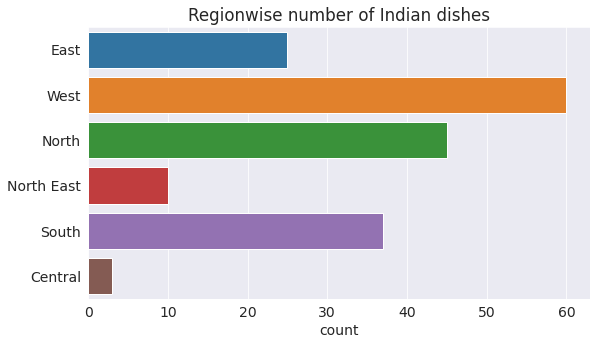

In [ ]:
sns.countplot(y=df1.region)
plt.title('Regionwise number of Indian dishes')
plt.ylabel(None);

From this graph we can clearly see the which region of India has more number of dishes.
*   **West India** has the **highest** number of dishes about **60 dishes**.
*   Followed by **North India** having the **second highest** number of dishes about **45 dishes**.
*   And **Central India** has the **least** number of dishes about **3 dishes**.



## Let's **answer** some of the interesting **questions** about the dataset.



### **Q1: Most of the Indian dishes comes under, Which type of diet i.e veg/non-veg?**

In [ ]:
total_dishes = 180
non_veg_dishes = (100*diet_counts[0]/total_dishes)
print('{:.1f}'.format(non_veg_dishes))

90.6


### **Answer:** **90.6%** of Indian dishes comes under **veg** category.

### **Q2: Which are the top three states in India having highest number of dishes?**

In [ ]:
top_state_counts = df1.state.value_counts()
top_state_counts.head(3)

Punjab         30
Gujarat        29
Maharashtra    23
Name: state, dtype: int64

### **Answer:** Top three Indian states having highest number of dishes are **Punjab**, **Gujarat**, and **Maharashtra**.

### **Q3: Most of the Indian dishes comes under, Which type of course?**


In [ ]:
course_counts = df1.course.value_counts()
course_counts

main course    83
dessert        70
snack          25
starter         2
Name: course, dtype: int64

### **Answer:** Most of the Indian dishes comes under **Main-course** category.

### **Q4: What type of flavor Most of the Indians prefer in the various dishes?**

In [ ]:
flavor_counts = df1.flavor_profile.value_counts()
flavor_counts

spicy     102
sweet      73
bitter      4
sour        1
Name: flavor_profile, dtype: int64

### **Answer:** Most of the Indian likes **spicy** flavor in their dishes followed by **sweet** flavor.

### **Q5: Which region of India has the highest and the least number of dishes?**

In [ ]:
region_counts = df1.region.value_counts()
region_counts

West          60
North         45
South         37
East          25
North East    10
Central        3
Name: region, dtype: int64

### **Answer:** **West India** has the highest number of dishes and **Central India** has the least number of dishes.

## **Inferences and Conclusion:**
* Most of the Indian dishes are **Vegetarian**.
* Large number of Indian dishes have **spicy** flavor.
* A large number of Indain dishes are served as **main course**.
* **Punjab** has the highest number of dishes followed by **Gujarat**.


# ***References and Future Work***

### *Here are some ideas for further exploration:*
*   Statewise analysis for Veg/Non-veg dishes.
*   Ingredientwise analysis for Indian dishes.
*   Preparation-time analysis for Indian dishes.
*   Cooking-time analysis for Indian dishes.

### *References:*
* **Source** of dataset: https://www.kaggle.com/nehaprabhavalkar/indian-food-101
* **pandas** library: https://pandas.pydata.org/docs/user_guide/index.html
* **matplotlib** library: https://matplotlib.org/3.3.1/users/index.html
* **seaborn** library: https://seaborn.pydata.org/tutorial.html
* **opendatasets** Python library: https://github.com/JovianML/opendatasets

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/sanjusaikap2001/indian-food-data-analysis-report


'https://jovian.ml/sanjusaikap2001/indian-food-data-analysis-report'